In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers


In [2]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [3]:
print("Categories:", np.unique(targets))
print("Number of unique words:",
len(np.unique(np.hstack(data))))
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173


In [4]:
print("Label:", targets[0])
print(data[0])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded)
print(len(index))

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        sequence = list(filter(lambda x: x < dimension, sequence))
        results[i, sequence] = 1
    return results
data_v = vectorize(data, dimension=1000)
targets = np.array(targets).astype("float32")

In [7]:
test_x = data_v[:10000]
test_y = targets[:10000]
train_x = data_v[10000:]
train_y = targets[10000:]

In [8]:
from keras import Sequential
model = Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(1000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                50050     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 55,201
Trainable params: 55,201
Non-traina

In [9]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"]
)

In [10]:
history1 = model.fit(train_x,
                     train_y,
                     epochs=2,
                     batch_size=500,
                     validation_data=(test_x, test_y)
                     ).history


Epoch 1/2
80/80 [==============================] - 2s 6ms/step - loss: 0.5084 - accuracy: 0.7450 - val_loss: 0.3457 - val_accuracy: 0.8542
Epoch 2/2
80/80 [==============================] - 0s 4ms/step - loss: 0.3457 - accuracy: 0.8515 - val_loss: 0.3219 - val_accuracy: 0.8640


In [19]:
data_v = vectorize(data, dimension=40000)
test_x = data_v[:10000]
test_y = targets[:10000]
train_x = data_v[10000:]
train_y = targets[10000:]
model = Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(40000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"]
)

In [20]:
history2 = model.fit(train_x,
                     train_y,
                     epochs=2,
                     batch_size=500,
                     validation_data=(test_x, test_y)
                     ).history

Epoch 1/2
80/80 [==============================] - 59s 697ms/step - loss: 0.4071 - accuracy: 0.8233 - val_loss: 0.2628 - val_accuracy: 0.8938
Epoch 2/2
80/80 [==============================] - 6s 77ms/step - loss: 0.2142 - accuracy: 0.9180 - val_loss: 0.2598 - val_accuracy: 0.8950


In [21]:
data_v = vectorize(data, dimension=10000)
test_x = data_v[:10000]
test_y = targets[:10000]
train_x = data_v[10000:]
train_y = targets[10000:]
model = Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"]
)

In [22]:
history3 = model.fit(train_x,
                     train_y,
                     epochs=2,
                     batch_size=500,
                     validation_data=(test_x, test_y)
                     ).history

Epoch 1/2
80/80 [==============================] - 3s 25ms/step - loss: 0.4118 - accuracy: 0.8162 - val_loss: 0.2657 - val_accuracy: 0.8924
Epoch 2/2
80/80 [==============================] - 1s 18ms/step - loss: 0.2161 - accuracy: 0.9174 - val_loss: 0.2627 - val_accuracy: 0.8971


In [23]:
def remove_non_alpha(word: str) -> str:
    return ''.join([char for char in word if char.isalpha()]).lower()
def user_text_to_input(text: str, dimension=10000):
    tokenized = []
    for word in text.split():
        word = remove_non_alpha(word)
        tokenized.append(index.get(word, 0) - 3)
    return vectorize([tokenized])
def predict(model, text) -> bool:
    return model.predict(user_text_to_input(text))[0][0]

In [24]:
good_review = """
To understand a part of this movie you have to know a little history. I went to school in the 90's in Eindhoven, a city near the place were the movie takes place. In that time a lot of people dressed as the people in the movie, drove the Sita scooters and drive around in Opel brand cars pretending to be the tough guys. Those people were called Johnny and Anita's. Sneakers, sport clothing and the haircuts you see in the movie were all over the place. Those were great times as we laughed a lot at their stupidity and general behavior.
So basically the writers/actors use that background and show us that kind of attitude and fashion is still alive in Maaskantje (the town were everything takes place). The actors behave like the Johnny's and Anita's back then, talking with an accent commonly used in that region. They are rebels, aggressive and lazy.
The story itself is about all of them losing their jobs and when the bills get too much and they also lose their social security money, they decide no longer to pay their bills. Of course it gets them into trouble and their aggressive behavior gets them even more deeply into trouble, up to the point were the authorities have to step in...
The movie looks good in all. Some stuff is funnier then other parts of the movie. Some cameo-appearances of (in)famous Dutch people. The actors are well know for their short video's from earlier New Kids and the Pulp Show and a lot of things will seem familiar looking at them and the movie.
I had a great laugh, it's an entertaining movie but don't have great expectations watching it. Over 1 million people went to the cinema to see this movie and it's a big hit in Germany too. The German translation is hilarious since the real actors dubbed it, not stopped by their lack of speaking German! It is no wonder this movie scores big time in Germany after movies like 'Manta Manta' and 'Manta the movie'...
ps don't watch this movie if you are a cop! """

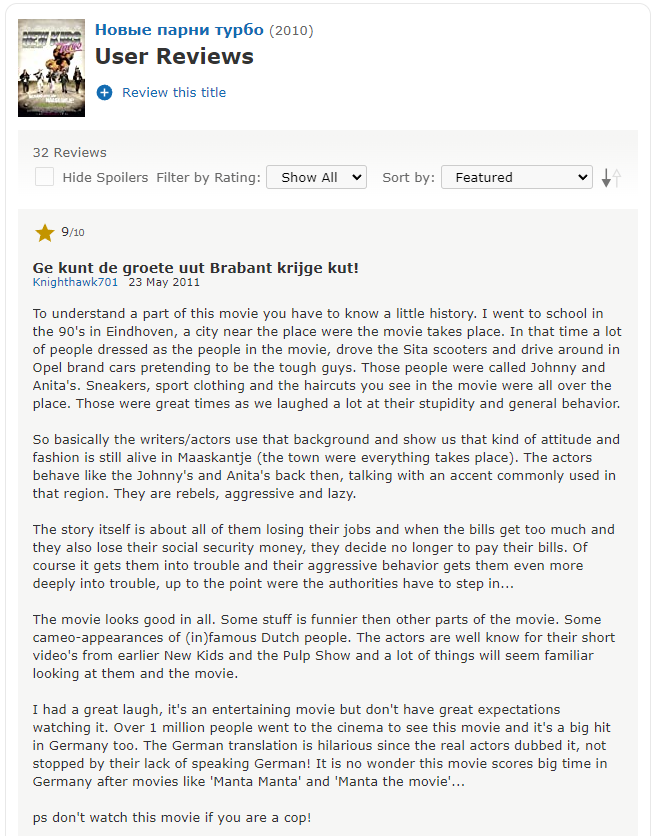

In [25]:
predict(model, good_review)

1/1 [==============================] - 1s 827ms/step


0.06700255

In [26]:
bad_review = """
Funny how people do react on this Dutch Movie, you love it or you hate it. First of all i was a fan of their sketches on Dutch TV, but this movie is much too long and goes on and on and on with no surprises. It's a lot of the same, a real disappointment The Dutch Press seems to have the same different opinion about this typical Dutch movie. They love it or they hate, in fact of the Dutch Papers NRC Next gave it 0 stars, which is uncommon, even for a bad movie . Making a sketch of 5 minutes is much easier that making a feature movie. And thats what the problem is with this movie. The second complain about the movie is that i expected another twist than what they normally bring, an extra. The fact that this didn't happen is not a big issue, but the fact that the film never has the same quality as the sketches is definitely a big disappointment.
"""

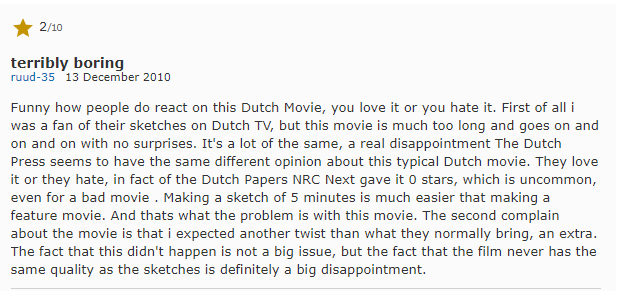

In [27]:
predict(model, bad_review)

1/1 [==============================] - 0s 15ms/step


0.7809912